<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 1. Библиотеки и инструменты для анализа данных. Математика в машинном обучении</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника". Решение</center>

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
%pylab inline
import pandas as pd
import sys
sys.path.append('../../scripts/') 
from scipy.stats import ttest_ind
# реализация Z-теста- дополнительно
from yandex_mipt_stat_tests import proportions_diff_z_test, proportions_diff_z_stat_ind 

Populating the interactive namespace from numpy and matplotlib


В качестве дополнительного задания будет проверка статистических гипотез. Реализация Z-критерия: tribute to YDF & MIPT ([специализация](https://www.coursera.org/specializations/machine-learning-data-analysis) "Машинное обучение и анализ данных").

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('../../data/titanic_train.csv')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Возьмем первые 10 элементов столбца Parch - количество родителей и детей пассажира на борту:**

In [5]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [6]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**1. Сколько мужчин / жещин находилось на борту?**

In [7]:
print("На борту было {} мужчин и {} женщин.".format(sum(data['Sex'] 
                                                        == 'male'), 
                                            sum(data['Sex'] 
                                                == 'female')))

На борту было 577 мужчин и 314 женщин.


**Проще:**

In [8]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно - это же распределение только для мужчин / женщин.**


In [9]:
pd.crosstab(data['Pclass'], data['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


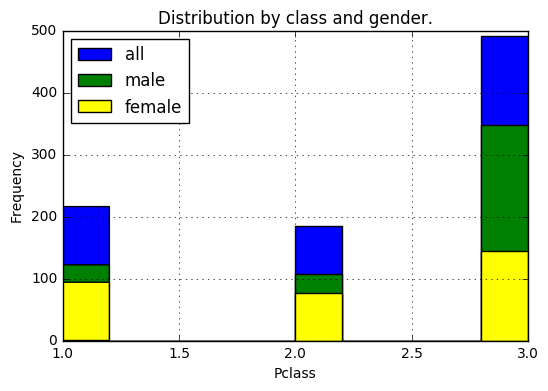

In [10]:
data['Pclass'].hist(label='all')
data[data['Sex'] == 'male']['Pclass'].hist(color="green", 
                                           label='male')
data[data['Sex'] == 'female']['Pclass'].hist(color="yellow", 
                                             label='female')
title('Distribution by class and gender.')
xlabel('Pclass')
ylabel('Frequency')
legend(loc='upper left')

**3. Сколько в среднем заплатил один пассажир? Найдите стандартное отклонение этой величины. Лучше округлить до 2 десятичных знаков.**

In [11]:
print("Mean fare: ", round(data['Fare'].mean(), 2))
print("Median fare: ", round(data['Fare'].median(), 2))
print("Fare std: ", round(data['Fare'].std(), 2))

Mean fare:  32.2
Median fare:  14.45
Fare std:  49.69


**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60**.

**Дополнительно: проверить, действительно ли молодые выживают чаще, с помощью Z-критерия для разности долей в независимых выборках (proportions_diff_z_test из ../../scripts/yandex_mipt_stat_tests.py)**

In [12]:
young_survived = data[data['Age'] < 30]['Survived']
old_survived = data[data['Age'] > 60]['Survived']

print("Доли выживыших: \n\t среди молодых {}%, \n\t среди старых {}%.".format(
    round(100 * young_survived.mean(), 2), 
        round(100 * old_survived.mean(), 2)))

Доли выживыших: 
	 среди молодых 40.62%, 
	 среди старых 22.73%.


Похоже, что разница сильная. Z-критерий это подтверждает на уровне значимости 0.05. 

In [13]:
help(proportions_diff_z_test)

Help on function proportions_diff_z_test in module yandex_mipt_stat_tests:

proportions_diff_z_test(z_stat, alternative='two-sided')
    :param z_stat (float) - Z-statistic computed for 2 binary vectors
    :alternative (str) - 'two-sided', 'less' or 'greater'
    
    :return p-value (float)



In [14]:
help(proportions_diff_z_stat_ind)

Help on function proportions_diff_z_stat_ind in module yandex_mipt_stat_tests:

proportions_diff_z_stat_ind(sample1, sample2)
    Computes z-statistic for two samples of binary variables.
    :param sample1 (list or array) - first binary array
    :param sample2 (list or array) - second binary array
    
    :return Z statistic (float)



In [15]:
round(proportions_diff_z_test(proportions_diff_z_stat_ind(young_survived, 
                                                    old_survived),
                       alternative = 'greater'), 4)

0.047600000000000003

**5. Правда ли, что женщины выживали чаще мужчин? Дополнительно: проверить, действительно ли женщины выживают чаще, с помощью Z-критерия для разности долей в независимых выборках.**

In [16]:
male_survived = data[data['Sex'] == 'male']['Survived']
female_survived = data[data['Sex'] == 'female']['Survived']


print("Доли выживыших: \n\t среди женщин {}%, \n\t среди мужчин {}%".format(
    round(100 * female_survived.mean(), 2), round(100 * male_survived.mean(), 2)))

Доли выживыших: 
	 среди женщин 74.2%, 
	 среди мужчин 18.89%


Разницу подтверждает и Z-тест.

In [17]:
round(proportions_diff_z_test(proportions_diff_z_stat_ind(female_survived, 
                                                    male_survived),
                       alternative = 'greater'), 4)

0.0

**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [18]:
'Braund, Mr. Owen Harri'.split('. ')[1].split()[0]

'Owen'

In [19]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [20]:
first_names = data[data['Sex'] 
             == 'male']['Name'].apply(lambda full_name: 
                full_name.split(',')[1].split()[1])
first_names.value_counts().head()

William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

**7. Сравните распределение стоимости билетов у спасенных и у погибших. Дополнительно: проверить равенство средних стоимостей билетов спасенных и погибших с помощью t-теста Стьюдента.**

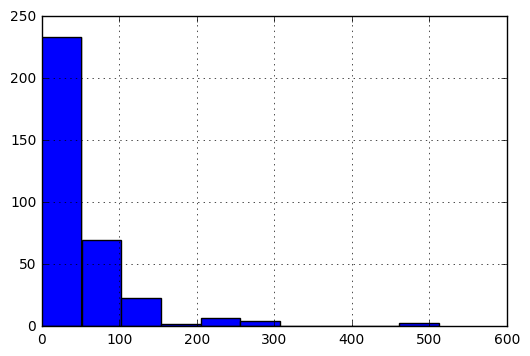

In [21]:

data[data['Survived'] == 1]['Fare'].hist()

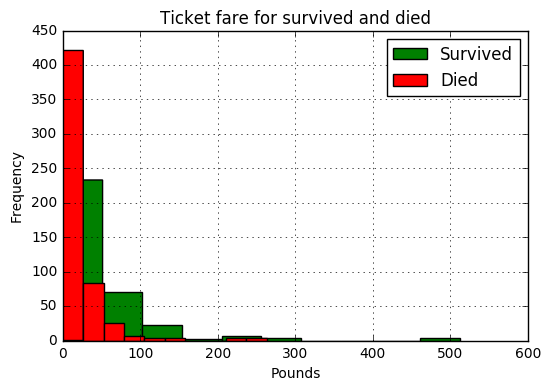

In [22]:
data[data['Survived'] == 1]['Fare'].hist(color="green", 
                                         label='Survived')
data[data['Survived'] == 0]['Fare'].hist(color="red", 
                                         label='Died')
title('Ticket fare for survived and died')
xlabel('Pounds')
ylabel('Frequency')
legend()

In [23]:
#!conda install seaborn
import seaborn as sns

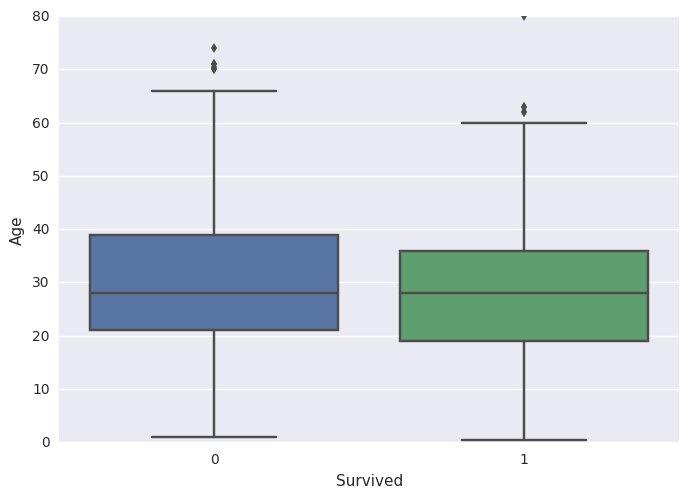

In [24]:
sns.boxplot(data['Survived'], data['Age'])

Разница подтверждается t-тестом.

In [25]:
ttest_ind(data[data['Survived'] == 1]['Fare'], 
          data[data['Survived'] == 0]['Fare'], equal_var=False)

Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [26]:
for cl in data['Pclass'].unique():
    for sex in data['Sex'].unique():
        print("Average age for {0} and class {1}: {2}".format(sex, cl, 
            round(data[(data['Sex'] == sex)
                         & (data['Pclass'] == cl)]['Age'].mean(),2)))

Average age for male and class 3: 26.51
Average age for female and class 3: 21.75
Average age for male and class 1: 41.28
Average age for female and class 1: 34.61
Average age for male and class 2: 30.74
Average age for female and class 2: 28.72


Более красивый подход:

In [27]:
for (cl, sex), sub_df in data.groupby(['Pclass', 'Sex']):
    print("Average age for {0} and class {1}: {2}".format(sex, cl,
                                    round(sub_df['Age'].mean(), 2)))

Average age for female and class 1: 34.61
Average age for male and class 1: 41.28
Average age for female and class 2: 28.72
Average age for male and class 2: 30.74
Average age for female and class 3: 21.75
Average age for male and class 3: 26.51


И еще круче:

In [28]:
pd.crosstab(data['Pclass'], data['Sex'], 
            values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589
